## Plot horizontally-averaged Phi within each LME

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
import numpy as np
from matplotlib import cm,colors
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
USER = os.environ['USER']

In [9]:
datadir = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{datadir}/DPLE-FOSI_hindcast_Phi_Eo_space_horizontal_mean_LME_1948-2017_monthly.nc'
boxOri = xr.open_dataset(filename)
boxOri

<xarray.Dataset>
Dimensions:  (lme: 11, time: 840, z_t: 35)
Coordinates:
  * lme      (lme) int64 1 2 3 4 5 6 7 8 9 10 65
  * time     (time) object 0249-02-01 00:00:00 ... 0319-01-01 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.277e+04 5.794e+04
Data variables: (12/13)
    Phi_0    (lme, time, z_t) float64 ...
    Phi_1    (lme, time, z_t) float64 ...
    Phi_2    (lme, time, z_t) float64 ...
    Phi_3    (lme, time, z_t) float64 ...
    Phi_4    (lme, time, z_t) float64 ...
    Phi_5    (lme, time, z_t) float64 ...
    ...       ...
    Phi_7    (lme, time, z_t) float64 ...
    Phi_8    (lme, time, z_t) float64 ...
    Phi_9    (lme, time, z_t) float64 ...
    Phi_10   (lme, time, z_t) float64 ...
    Phi_11   (lme, time, z_t) float64 ...
    Phi_12   (lme, time, z_t) float64 ...

In [4]:
var = 'Phi'
var_name = 'Phi_6'
z_t = -boxOri['z_t']/1e2 #m
z_t[0] = 0

In [5]:
from matplotlib import rc, gridspec
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
boxna = ['01-EBS','02-GoA','03-CC','04-GoC','05-GoM','06-SEUS','07-NEUS','08-SS','09-LN','10-IPH','11-AI']
boxnb = [1,2,3,4,5,6,7,8,9,10,65]
cols = ['gold','orangered','orangered','dodgerblue','gold','dodgerblue','orangered','dodgerblue','gold','orangered','dodgerblue']

In [11]:
Phi_Ori = np.zeros([11, 13, 35])
Phi_Ori_yr = np.zeros([11,13,64,35])
Phi_std = Phi_Ori.copy()
for box, jj in zip(boxnb, range(len(boxnb))):
    for ii in range(13):
        Ori = (boxOri[f'{var}_{ii}'].sel(lme=box)[72:840].values).reshape([64, 12, 35])
        Phi_Ori[jj, ii] = Ori.mean(axis=1).mean(axis=0)
        Phi_Ori_yr[jj,ii] = Ori.mean(axis=1)
        Phi_std[jj, ii] = Ori.mean(axis=1).std(axis=0)

1 0
65 10
10 9
2 1
3 2
4 3
5 4
6 5
9 8
8 7
7 6


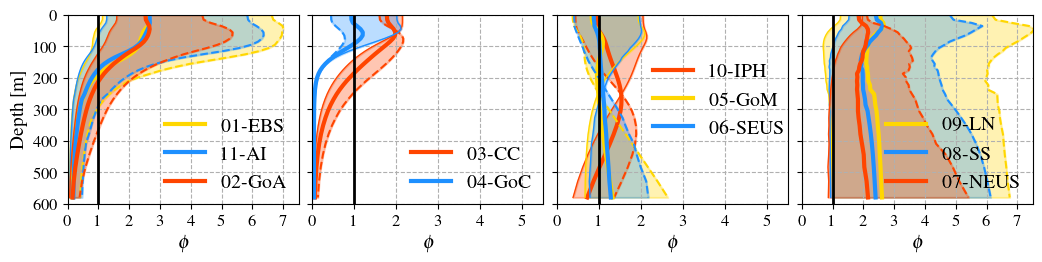

In [12]:
fig = plt.figure(figsize=[11, 3.])
gs = gridspec.GridSpec(1, 3)
#
ax0 = fig.add_axes([0.083, 0.17, 0.21, 0.21*3])
ax1 = fig.add_axes([0.083+0.2225, 0.17, 0.21, 0.21*3])
ax2 = fig.add_axes([0.083+0.445, 0.17, 0.21, 0.21*3])
ax3 = fig.add_axes([0.083+0.6675, 0.17, 0.21, 0.21*3])
newbox = list(zip(boxnb, range(len(boxnb))))
nnbox = [newbox[0]]+[newbox[10]]+[newbox[9]]+newbox[1:6]+[newbox[8]]+[newbox[7]]+[newbox[6]]
for box, jj in nnbox:
    print(box,jj)
    for ii in [6]:
        if box in [1, 2, 65]:
            ax0.fill_betweenx(z_t, np.min(Phi_Ori[jj],axis=0), np.max(Phi_Ori[jj],axis=0), lw=1.5, color=cols[jj], alpha=0.3)
            ax0.plot(Phi_Ori[jj, ii], z_t, color=cols[jj], lw=3, label=boxna[jj])
            ax0.plot(Phi_Ori[jj, 0], z_t, color=cols[jj], lw=1.)
            ax0.plot(Phi_Ori[jj, 12], z_t, color=cols[jj], lw=1.5, linestyle='dashed')
        if box in [3, 4]:
            ax1.fill_betweenx(z_t, np.min(Phi_Ori[jj],axis=0), np.max(Phi_Ori[jj],axis=0), lw=1.5, color=cols[jj], alpha=0.3)
            ax1.plot(Phi_Ori[jj, ii], z_t, color=cols[jj], lw=3, label=boxna[jj])
            ax1.plot(Phi_Ori[jj, 0], z_t, color=cols[jj], lw=1.)
            ax1.plot(Phi_Ori[jj, 12], z_t, color=cols[jj], lw=1.5, linestyle='dashed')
        elif box in [5, 6, 10]:
            ax2.fill_betweenx(z_t, np.min(Phi_Ori[jj],axis=0), np.max(Phi_Ori[jj],axis=0), lw=1.5, color=cols[jj], alpha=0.3)
            ax2.plot(Phi_Ori[jj, ii], z_t, color=cols[jj], lw=3, label=boxna[jj])
            ax2.plot(Phi_Ori[jj, 0], z_t, color=cols[jj], lw=1.)
            ax2.plot(Phi_Ori[jj, 12], z_t, color=cols[jj], lw=1.5, linestyle='dashed')
        elif box in [7, 8, 9]:
            ax3.fill_betweenx(z_t, np.min(Phi_Ori[jj],axis=0), np.max(Phi_Ori[jj],axis=0), lw=1.5, color=cols[jj], alpha=0.3)
            ax3.plot(Phi_Ori[jj, ii], z_t, color=cols[jj], lw=3, label=boxna[jj])
            ax3.plot(Phi_Ori[jj, 0], z_t, color=cols[jj], lw=1.)
            ax3.plot(Phi_Ori[jj, 12], z_t, color=cols[jj], lw=1.5, linestyle='dashed')
#
for ax in [ax0, ax1, ax2, ax3]:
    ax.grid(linestyle='dashed')
    ax.plot([1, 1], [-600, 0], color='k', lw=2., zorder=2)
    #
    ax.set_yticks(np.arange(-600, 1, 100))
    ax.set_yticklabels([str(abs(dd)) for dd in np.arange(-600, 1, 100)],fontsize=12)
    #
    ax.set_xlabel("$\phi$", fontsize=14, fontweight='bold')
    ax.set_ylim(-600, 0)
    if ax in [ax0]:
        ax.set_xticks(np.arange(0, 7.6, 1))
        ax.set_xticklabels(['%d' % dd for dd in np.arange(0,7.6,1)],fontsize=12)
        ax.set_xlim(-.0, 7.5)
        ax.legend(loc='lower right', fontsize='x-large', borderpad=.1, frameon=False)
        ax.set_ylabel('Depth [m]', fontsize=14, fontweight='bold')
    elif ax in [ax1]:
        ax.set_xticks(np.arange(0, 7.6, 1))
        ax.set_xticklabels(['%d' % dd for dd in np.arange(0,7.6,1)],fontsize=12)
        ax.set_xlim(-.0, 5.5)
        ax.set_yticklabels('')
        ax.legend(loc='lower right', fontsize='x-large', borderpad=.1, frameon=False)
    elif ax in [ax2]:
        ax.set_xticks(np.arange(0, 7.6, 1))
        ax.set_xticklabels(['%d' % dd for dd in np.arange(0,7.6,1)],fontsize=12)
        ax.set_xlim(-.0, 5.5)
        ax.set_yticklabels('')
        ax.legend(loc='right', bbox_to_anchor=(1.035, 0.55), fontsize='x-large', borderpad=.1, frameon=False)
    else:
        ax.set_xticks(np.arange(0, 7.6, 1))
        ax.set_xticklabels(['%d' % dd for dd in np.arange(0,7.6,1)],fontsize=12)
        ax.set_xlim(-.0, 7.5)
        ax.set_yticklabels('')
        ax.legend(loc='lower right', fontsize='x-large', borderpad=.1, frameon=False)
#
output = f'/glade/scratch/{USER}/DPLE-plots'
outfile = f'{output}/LME_box01-11_FOSI_hindcast_{var_name}_Eo_space_vertical_distribution_mean_1948-2017.png'
plt.savefig(outfile, dpi=400, transparent=True)
plt.show()